In [1]:
import sys, os, json

In [2]:
anchor_path = os.path.join(os.getcwd(), "AnchorSBM&Creel")
guillotine_path = os.path.join(os.getcwd(), "Guillotine&Creel")
guill_abs_path = os.path.join(os.getcwd(), "GuillotineAbsolute&Creel")

In [3]:
def json_filter(nr_itemss, problems, nr_colourss):
    return [str(nr_items) + "_" + str(width) + "_" + str(height) + "_" + str(nr_colours) + ".json" for nr_items in nr_itemss for (width,height) in problems for nr_colours in nr_colourss]

In [4]:
jsons = json_filter([4], [(100,400)], [1,2,3,4,5])

anchor_jsons = []
guillotine_jsons = []
guill_abs_jsons = []

for file in jsons:
    anchor_file = os.path.join(anchor_path, file)
    guillotine_file = os.path.join(guillotine_path, file)
    guill_abs_file = os.path.join(guill_abs_path, file)

    anchor_jsons.append( json.load(open(anchor_file)))
    guillotine_jsons.append(json.load(open(guillotine_file)))
    guill_abs_jsons.append(json.load(open(guill_abs_file)))
jsons

['4_100_400_1.json',
 '4_100_400_2.json',
 '4_100_400_3.json',
 '4_100_400_4.json',
 '4_100_400_5.json']

In [5]:
def stats(jsons):
    items_list = []
    variables_list = []
    constraints_list = []
    for json in jsons:
        for problem in json.keys():

            for problem_instance in json[problem]:
                items = problem_instance["items"]
                items_list.append(items)
                variables = problem_instance["variables"]
                variables_list.append(variables)
                constraints = problem_instance["constraints"]
                constraints_list.append(constraints)
                #print(items, variables, constraints["no_overlap"], constraints["no_overlap"] / sum(constraints.values()))
    return items_list, variables_list, constraints_list

In [6]:
import matplotlib.pyplot as plt

50
50


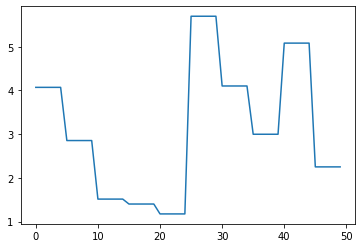

In [7]:
items1, variables1, constraints1 = stats(anchor_jsons)

items2, variables2, constraints2 = stats(guillotine_jsons)

items3, variables3, constraints3 = stats(guill_abs_jsons)

print(len(constraints1))
print(len(constraints2))

plt.plot( [c2/c1 for c1,c2 in sorted(zip(constraints1, constraints3))], label="anchor vs guill")

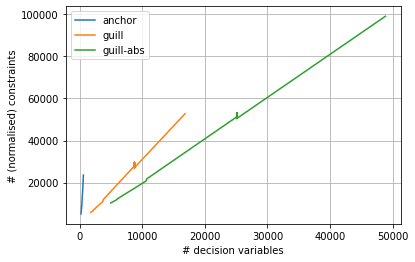

In [8]:
items, variables, constraints = stats(anchor_jsons)
plt.plot(sorted(variables), [c for _,c in sorted(zip(variables, constraints))], label="anchor")

items, variables, constraints = stats(guillotine_jsons)
plt.plot(sorted(variables), [c for _,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])], label="guill")

items, variables, constraints = stats(guill_abs_jsons)
plt.plot(sorted(variables), [c for _,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])], label="guill-abs")

plt.grid()
#plt.title("Model size")
plt.xlabel(r"# decision variables")
plt.ylabel(r"# (normalised) constraints")
plt.legend()

In [9]:
import seaborn as sea
import pandas as pd
import numpy as np

Text(0, 0.5, '# (normalised) constraints')

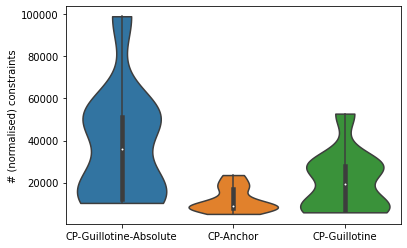

In [13]:
items, variables, constraints = stats(anchor_jsons)
a1 = [c for v,c in sorted(zip(variables, constraints))]

items, variables, constraints = stats(guillotine_jsons)
a2 = [c for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

items, variables, constraints = stats(guill_abs_jsons)
a3 = [c for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

#plt.violinplot([a1, a2, a3])
sea.violinplot(data=pd.DataFrame({"CP-Guillotine-Absolute": a3, "CP-Anchor": a1, "CP-Guillotine": a2}), scale="count", cut=0)#plt.scatter(x=[0,1,2], y=[np.mean(a1), np.mean(a2), np.mean(a3)], c="r")
plt.ylabel("# (normalised) constraints")


Text(0, 0.5, '# variables')

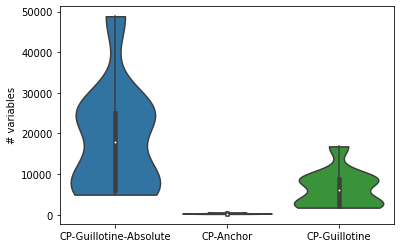

In [14]:
items, variables, constraints = stats(anchor_jsons)
a1 = [v for v,c in sorted(zip(variables, constraints))]

items, variables, constraints = stats(guillotine_jsons)
a2 = [v for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

items, variables, constraints = stats(guill_abs_jsons)
a3 = [v for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

#plt.violinplot([a1, a2, a3])
sea.violinplot(data=pd.DataFrame({"CP-Guillotine-Absolute": a3, "CP-Anchor": a1, "CP-Guillotine": a2}), scale="count", cut=0)
plt.ylabel("# variables")


Text(0, 0.5, '#constraints / #variables')

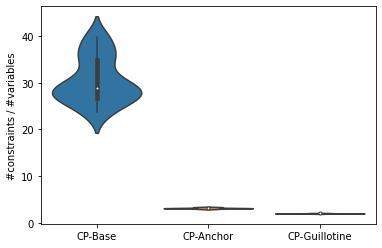

In [12]:
items, variables, constraints = stats(anchor_jsons)
a1 = [c/v for v,c in sorted(zip(variables, constraints))]

items, variables, constraints = stats(guillotine_jsons)
a2 = [c/v for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

items, variables, constraints = stats(guill_abs_jsons)
a3 = [c/v for v,c in sorted(zip(variables, constraints), key=lambda pair: pair[0])]

#plt.violinplot([a1, a2, a3])
sea.violinplot(data=pd.DataFrame({"CP-Base": a1, "CP-Anchor": a2, "CP-Guillotine": a3}), scale="count")
plt.ylabel("#constraints / #variables")